#Clustering Assignment

1. What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.

- K-Means Clustering
  - K-Means is a partition based clustering algorithm. It divides the dataset into a fixed number of clusters decided in advance. The algorithm works by assigning data points to the nearest cluster centroid and then updating the centroid iteratively. It is fast and works well for large datasets but requires the number of clusters to be specified beforehand.

 - Use Case
   - K-Means is commonly used in customer segmentation. For example grouping customers based on purchase behavior in an ecommerce platform.

 - Hierarchical Clustering
   -  Hierarchical clustering builds a tree like structure called a dendrogram. It does not require specifying the number of clusters initially. Clusters are formed either by merging smaller clusters or splitting larger clusters step by step. It is useful for understanding data structure but is computationally expensive for large datasets.

- Use Case
  - Hierarchical clustering is used in biological data analysis such as grouping genes based on similarity.

2. Explain the purpose of the Silhouette Score in evaluating clustering algorithms.

- The Silhouette Score is used to evaluate how well data points are clustered. It measures how similar a data point is to its own cluster compared to other clusters. The score ranges from minus one to one. A high score indicates that the data point is well matched to its cluster and poorly matched to neighboring clusters. It helps in comparing different clustering models and selecting the optimal number of clusters.

3. What are the core parameters of DBSCAN, and how do they influence the clustering process?

 - DBSCAN has two core parameters.

 - Epsilon
   - Epsilon defines the maximum distance between two data points to be considered neighbors. A small epsilon leads to many points being classified as noise, while a large epsilon can merge distinct clusters.

- Min Samples
   - Min Samples defines the minimum number of data points required to form a dense region. A higher value makes the algorithm stricter and reduces noise sensitivity.

- Together these parameters control how clusters are formed and how noise is identified.

4. Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?

 - Feature scaling is important because clustering algorithms rely on distance calculations. If features are on different scales, features with larger values dominate the distance computation. This can lead to incorrect clustering results. Scaling ensures that all features contribute equally, improving accuracy and cluster quality.

5. What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?

 - The Elbow Method is used to determine the optimal number of clusters in K-Means. It works by plotting the number of clusters against the within cluster sum of squares. As the number of clusters increases, the error decreases. The point where the decrease becomes slow and forms an elbow shape is considered the optimal number of clusters. This method helps balance model simplicity and clustering accuracy.

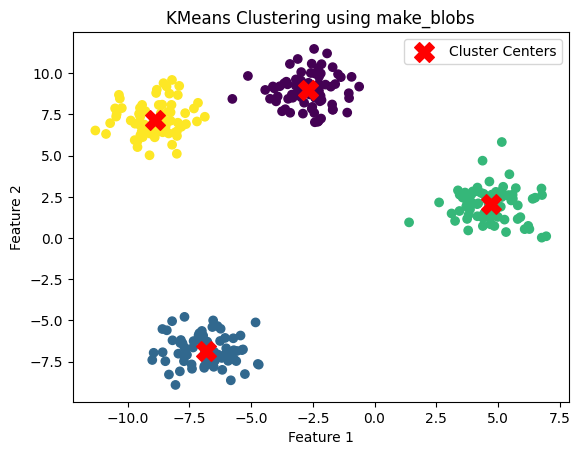

In [1]:
#6. Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers.

# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Get cluster labels and centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],
            c='red', marker='X', s=200, label='Cluster Centers')

plt.title("KMeans Clustering using make_blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [2]:
#7. Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise)

# Import required libraries
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load Wine dataset
data = load_wine()
X = data.data

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Find number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Print result
print("Number of clusters found (excluding noise):", n_clusters)


Number of clusters found (excluding noise): 0


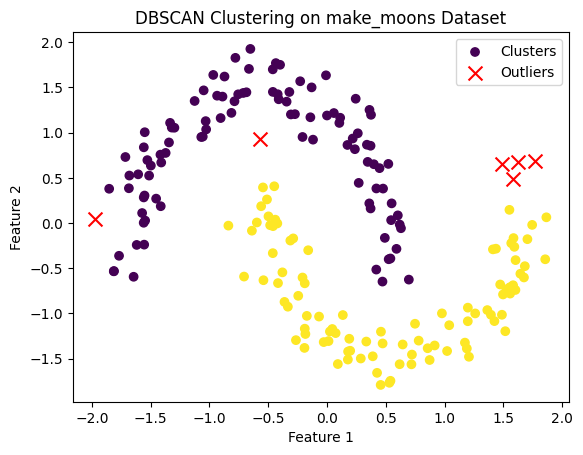

In [3]:
#8. Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.

# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

# Generate moon-shaped data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Separate core points and outliers
outliers = labels == -1

# Plot the clusters
plt.scatter(X_scaled[~outliers, 0], X_scaled[~outliers, 1],
            c=labels[~outliers], cmap='viridis', label='Clusters')

# Highlight outliers
plt.scatter(X_scaled[outliers, 0], X_scaled[outliers, 1],
            c='red', marker='x', s=100, label='Outliers')

plt.title("DBSCAN Clustering on make_moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


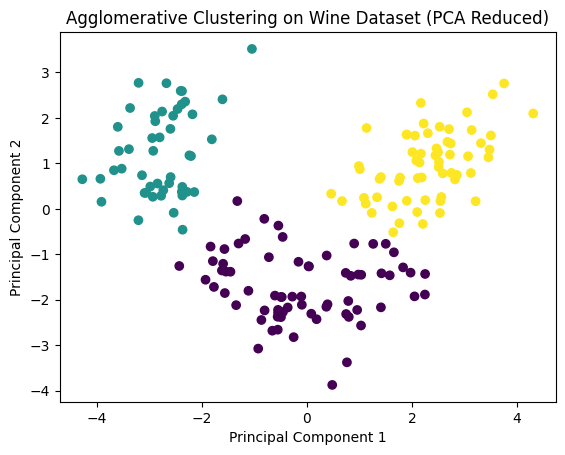

In [4]:
#9. Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.

# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Load Wine dataset
data = load_wine()
X = data.data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce data to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
labels = agglo.fit_predict(X_pca)

# Visualize the clustering result
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title("Agglomerative Clustering on Wine Dataset (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


10. You are working as a data analyst at an e-commerce company. The marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product purchase history across categories. Describe your real-world data science workflow using clustering:
    - ● Which clustering algorithm(s) would you use and why?
    - ● How would you preprocess the data (missing values, scaling)?
    - ● How would you determine the number of clusters?
    - ● How would the marketing team benefit from your clustering analysis?

- Customer Segmentation using Clustering (with Code)

  In an e-commerce company, clustering is used to segment customers based on their purchasing behavior so that targeted promotions can be designed effectively.

- Clustering Algorithm Used

  KMeans clustering is used because it is simple, fast, and works well for large customer datasets. It groups customers with similar behavior into clear and interpretable clusters.

- Data Preprocessing

  Missing numerical values are handled using mean imputation. Feature scaling is done using StandardScaler because clustering algorithms are distance-based and require features to be on the same scale.

- Choosing the Number of Clusters

  The Elbow method and Silhouette score are used to determine the optimal number of clusters. These methods help identify well-separated and meaningful clusters.

- Business Benefit

  Customer clustering helps the marketing team run targeted promotions, personalize offers, improve customer retention, and optimize marketing spending.  

In [5]:
# Import required libraries
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate synthetic customer data
# (represents purchase behavior and demographics)
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Evaluate clustering
sil_score = silhouette_score(X_scaled, labels)

# Print output
print("Number of clusters formed:", len(set(labels)))
print("Silhouette Score:", sil_score)


Number of clusters formed: 4
Silhouette Score: 0.7974739889632732
